# Import the dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = '../Telco_customer_churn.xlsx'
# Load the dataset
data = pd.read_excel(path)

# Display the first few rows of the dataset
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


# Data Types in Each Column

In [11]:
print(data.dtypes)

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object


# Meaning of Data Columns 

7043 observations with 33 variables

CustomerID: A unique ID that identifies each customer.

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Country: The country of the customer’s primary residence.

State: The state of the customer’s primary residence.

City: The city of the customer’s primary residence.

Zip Code: The zip code of the customer’s primary residence.

Lat Long: The combined latitude and longitude of the customer’s primary residence.

Latitude: The latitude of the customer’s primary residence.

Longitude: The longitude of the customer’s primary residence.

Gender: The customer’s gender: Male, Female

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Partner: Indicate if the customer has a partner: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

## Check for missing values

In [12]:
# count Na values in the data
print(data.isnull().sum())

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


# Discovery

Churn Reason is the only column with missing values 

# Understand the Target Variable Distribution

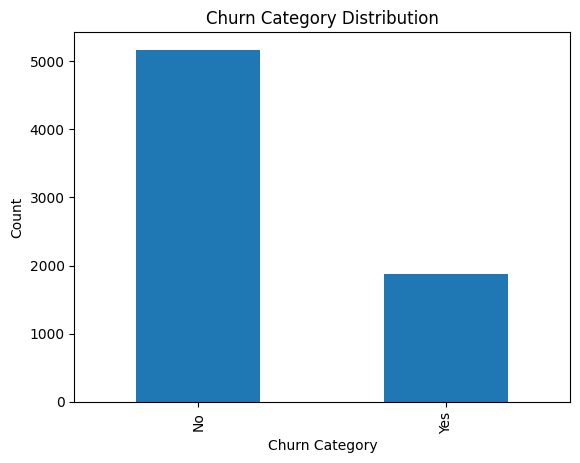

In [14]:
# the target variable distribution using a bargraph 
data['Churn Label'].value_counts().plot(kind='bar')
plt.title('Churn Category Distribution')
plt.xlabel('Churn Category')
plt.ylabel('Count')
plt.show()

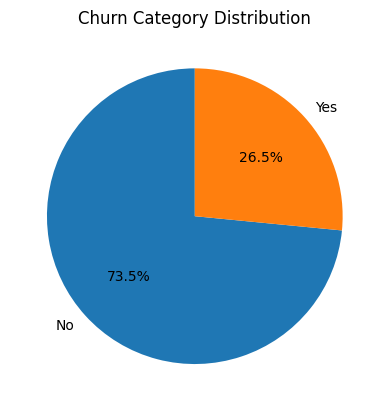

In [15]:
# using a pie chart to visualize the distribution of the target variable
data['Churn Label'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Churn Category Distribution')
plt.ylabel('')  # Hide y-label for better aesthetics
plt.show()

# Observation

There are `7043` individuals observed in the churn dataset. Of these individuals:

1. The people that leave the Telco company are `26.5%`
2. The people that are retained in the Telco are `73.5%`

## What this means for later steps 

The highly skewed distribution means that when developing prediction models:

1. There will be a need to use techniques like **resampling** (oversampling the minority class or undersampling the majority class) or 
2. class weighting when training your model to avoid biased predictions.

# Cleaning Missing Values

The approach to handling missing values depends on the nature of the data and the percentage of missing data.

1. **Deletion:** If a feature (column) has a very high percentage of missing values (e.g., over `70-80%`), it's often best to delete the entire feature. If a few rows have missing data, and the dataset is large, you can delete the rows with missing values. However, this isn't recommended for smaller datasets, as you'd lose valuable information.

2. **Imputation:** This is the most common approach and involves replacing missing values with a substitute.

## Mean/Median/Mode Imputation

&emsp;&emsp; Mean imputation is suitable for features with a normal distribution and no significant outliers.

&emsp;&emsp; Median imputation is the most robust and widely used method for numerical features, especially when the data contains outliers or is skewed. The median is less affected by extreme values.

## Mode imputation 
&emsp;&emsp; is the standard for categorical features.

## Advanced Imputation
&emsp;&emsp; For more complex situations, advanced methods like K-Nearest Neighbors (KNN) imputation or multiple imputation by chained equations (MICE) can be used. These methods estimate missing values based on the relationships with other features in the dataset, often providing more accurate results.

# Encode Categorical Variables

Categorical variables (e.g., 'country' or 'color') must be converted into numerical formats for most machine learning algorithms. The choice of encoding method depends on whether the categories have an inherent order.

## One-Hot Encoding

&emsp;&emsp;This is the most common method for nominal categorical variables (variables without an order, like 'red', 'green', 'blue').

&emsp;&emsp;It creates a new binary column for each unique category. A value of 1 indicates the presence of that category, and 0 indicates its absence. This prevents the model from assuming an incorrect ordinal relationship.

&emsp;&emsp;It is the standard for algorithms like linear regression, logistic regression, and support vector machines (SVMs).

## Ordinal Encoding

&emsp;&emsp;This is used when categories have a natural, meaningful order (e.g., 'low', 'medium', 'high').

&emsp;&emsp;Each category is assigned an integer based on its rank (e.g., 'low' = 0, 'medium' = 1, 'high' = 2). This is useful for algorithms like decision trees and random forests, which can interpret the ordinal relationship.

## Other Encoding Methods
&emsp;&emsp;More advanced techniques like target encoding, binary encoding, or count encoding are used for high-cardinality features (features with many unique categories) to reduce the dimensionality that One-Hot Encoding would create.

# Scale Numeric Features

Scaling numeric features is essential for algorithms that are sensitive to the magnitude and range of the data. This includes distance-based algorithms like KNN, SVM, and K-means, as well as gradient-descent-based algorithms like linear and logistic regression and neural networks.

## Crucial Best Practice
Always perform feature scaling after splitting your data into training and test sets to prevent data leakage. The scaler should be fitted only on the training data and then used to transform both the training and test sets.

### Standardization (Z-score Normalization)

&emsp;&emsp;This is a robust and widely used technique.

&emsp;&emsp;It transforms the data to have a mean of 0 and a standard deviation of 1

$$z = \frac{x - \mu}{\sigma}$$


&emsp;&emsp;It works well with datasets that have a Gaussian (normal) distribution or when the algorithm assumes a normal distribution. It is also less affected by outliers than Min-Max scaling.

&emsp;&emsp;It is the standard for algorithms like linear regression and logistic regression.

### Normalization (Min-Max Scaling)

&emsp;&emsp;This method scales all feature values to a fixed range, typically [0, 1].

&emsp;&emsp;The formula is: 

$$
X_{scaled​}=\frac{X​−X_{min​X}}{X_{max}−X_{min}}
$$ 


&emsp;&emsp;It's a good choice for algorithms that require inputs to be within a specific range, such as neural networks and image processing algorithms.

&emsp;&emsp;A significant drawback is its s`ensitivity to outliers`, which can compress the majority of the data into a very small range.

### Robust Scaling

&emsp;&emsp;Use this technique when your dataset contains many outliers.

&emsp;&emsp;It scales the data using the median and the interquartile range (IQR), making it less affected by extreme values than other methods. 

The formula is: 

$$X_{scaled}​=\frac{X − Median}{IQR}$$